In [1]:
import sys
sys.path.append('./code')
sys.path.append('./data')

from clustering import *

np.random.seed(1)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.linewidth'] = 1.25

In [2]:
def do_one_test(nClusters,nStates, N, T, nClustMax):
    tt, qq = generateChains(nStates, nClusters) # randomly generate chains
    mixtureProbs = np.repeat(1 / nClusters, nClusters)  # uniform for now
    Xt, trueLabels = generateTrajectories(N, T, mixtureProbs, qq, tt) # sample 

    nEM = 100

    zHat, muHat, qHat, pHat, steps, logL = doVEMmulti(Xt, nClustMax, nStates, nEM=nEM)

    best_assignment, zHat_c, qHat_c, muHat_c, pHat_c = find_best_clustermatch(trueLabels.T, zHat, muHat, qHat, pHat)  # uses HUNGARIAN ALGORITHM to assign best permutation
    
    predictLabels = zHat_c.argmax(axis=1)
    N, nClusters = np.shape(zHat)    
    #zTrue = np.zeros((N, nClusters))
    #zTrue[np.arange(N),trueLabels.T]=1

    #diffZhat = np.linalg.norm(zTrue-zHat_c, axis=1, ord=1)/2.0

    error = sum(predictLabels==trueLabels)/N
    #rand_error = adjusted_rand_score(trueLabels,predictLabels)
    return error

In [3]:
nVals = np.logspace(1,3,9)
tVals = np.logspace(np.log10(5),2,11)
nSims =250
nClustMax=4
nStates=3
nClusters=4
from joblib import Parallel, delayed

accs = np.zeros([len(nVals),len(tVals),nSims])

for i in range(len(nVals)):
    N = np.ceil(nVals[i]).astype('int64')
    for j in range(len(tVals)):
        print([i,j])
        T = np.ceil(tVals[j]).astype('int64')
        results = Parallel(n_jobs=-1)(delayed(do_one_test)(nClusters,nStates, N, T, nClustMax) for _ in range(nSims))
        accs[i,j,:] = results
        
acc_mean = np.mean(accs,axis=2)

[0, 0]
[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 5]
[0, 6]
[0, 7]
[0, 8]
[0, 9]
[0, 10]
[1, 0]
[1, 1]
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[1, 7]
[1, 8]
[1, 9]
[1, 10]
[2, 0]
[2, 1]
[2, 2]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[2, 7]
[2, 8]
[2, 9]
[2, 10]
[3, 0]
[3, 1]
[3, 2]
[3, 3]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[3, 10]
[4, 0]
[4, 1]
[4, 2]
[4, 3]
[4, 4]
[4, 5]
[4, 6]
[4, 7]
[4, 8]
[4, 9]
[4, 10]
[5, 0]
[5, 1]
[5, 2]
[5, 3]
[5, 4]
[5, 5]
[5, 6]
[5, 7]
[5, 8]
[5, 9]
[5, 10]
[6, 0]
[6, 1]
[6, 2]
[6, 3]
[6, 4]
[6, 5]
[6, 6]
[6, 7]
[6, 8]
[6, 9]
[6, 10]
[7, 0]
[7, 1]
[7, 2]
[7, 3]
[7, 4]
[7, 5]
[7, 6]
[7, 7]
[7, 8]
[7, 9]
[7, 10]
[8, 0]
[8, 1]
[8, 2]
[8, 3]
[8, 4]
[8, 5]
[8, 6]
[8, 7]
[8, 8]
[8, 9]
[8, 10]


In [4]:

nClustMax=10

accs2 = np.zeros([len(nVals),len(tVals),nSims])

for i in range(len(nVals)):
    N = np.ceil(nVals[i]).astype('int64')
    for j in range(len(tVals)):
        print([i,j])
        T = np.ceil(tVals[j]).astype('int64')
        results = Parallel(n_jobs=-1)(delayed(do_one_test)(nClusters,nStates, N, T, nClustMax) for _ in range(nSims))
        accs2[i,j,:] = results

acc_mean2 = np.mean(accs2,axis=2)

[0, 0]
[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 5]
[0, 6]
[0, 7]
[0, 8]
[0, 9]
[0, 10]
[1, 0]
[1, 1]
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[1, 7]
[1, 8]
[1, 9]
[1, 10]
[2, 0]
[2, 1]
[2, 2]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[2, 7]
[2, 8]
[2, 9]
[2, 10]
[3, 0]
[3, 1]
[3, 2]
[3, 3]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[3, 10]
[4, 0]
[4, 1]
[4, 2]
[4, 3]
[4, 4]
[4, 5]
[4, 6]
[4, 7]
[4, 8]
[4, 9]
[4, 10]
[5, 0]
[5, 1]
[5, 2]
[5, 3]
[5, 4]
[5, 5]
[5, 6]
[5, 7]
[5, 8]
[5, 9]
[5, 10]
[6, 0]
[6, 1]
[6, 2]
[6, 3]
[6, 4]
[6, 5]
[6, 6]
[6, 7]
[6, 8]
[6, 9]
[6, 10]
[7, 0]
[7, 1]
[7, 2]
[7, 3]
[7, 4]
[7, 5]
[7, 6]
[7, 7]
[7, 8]
[7, 9]
[7, 10]
[8, 0]
[8, 1]
[8, 2]
[8, 3]
[8, 4]
[8, 5]
[8, 6]
[8, 7]
[8, 8]
[8, 9]
[8, 10]


In [5]:
with open('temp/fig2.npy', 'wb') as f:
    np.save(f, accs)
    np.save(f, accs2)
    np.save(f, acc_mean)
    np.save(f, acc_mean2)
    np.save(f, nVals)
    np.save(f, tVals)



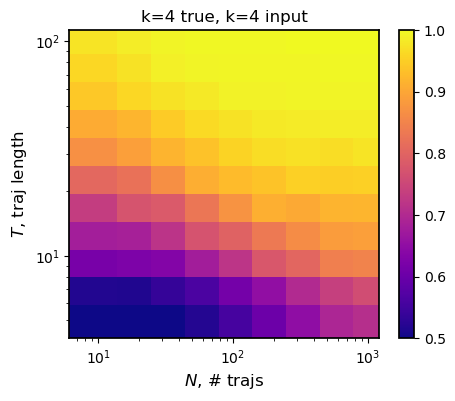

In [6]:
cc="plasma"

fig, ax = plt.subplots(figsize=(5,4)) 
im=ax.pcolormesh(nVals,tVals,acc_mean.T,clim=(0.5,1),cmap=cc)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$N$, # trajs',fontsize=12)
ax.set_ylabel('$T$, traj length',fontsize=12)
ax.set_title('k=4 true, k=4 input')
fig.colorbar(im, ax=ax)
plt.savefig('figs/sweep_accuracy_4.pdf',format="pdf")

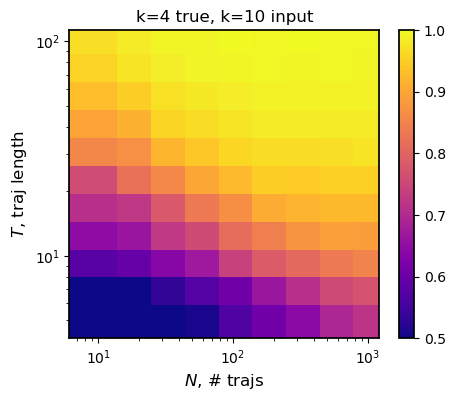

In [7]:
fig, ax = plt.subplots(figsize=(5,4)) 
im=ax.pcolormesh(nVals,tVals,acc_mean2.T,clim=(0.5,1),cmap=cc)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$N$, # trajs',fontsize=12)
ax.set_ylabel('$T$, traj length',fontsize=12)
ax.set_title('k=4 true, k=10 input')
fig.colorbar(im, ax=ax)
plt.savefig('figs/sweep_accuracy_10.pdf',format="pdf")

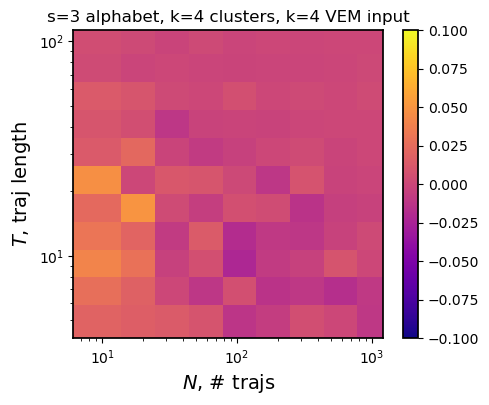

In [8]:
cc="plasma"
#import cmcrameri.cm as cmc
#cc = cmc.hawaii
fig, ax = plt.subplots(figsize=(5,4)) 
im=ax.pcolormesh(nVals,tVals,acc_mean.T-acc_mean2.T,clim=(-.1,.1),cmap=cc)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$N$, # trajs',fontsize=14)
ax.set_ylabel('$T$, traj length',fontsize=14)
ax.set_title('s=3 alphabet, k=4 clusters, k=4 VEM input')
fig.colorbar(im, ax=ax)
